# Quantified Self Assignment

## Part 1. Data Analysis

### COMM2550 (Spring 2023)

### Setup

In [1]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Upload and load your survey log data

* Download the data from the Google Sheet linked to your Google Form in CSV format

![](img/google_sheet.png)

1. Go to `File > Download`
2. Select `Comma separated values (.csv)`


* Rename the file `my_daily_log.csv`


* Upload `my_daily_log.csv` to the `data` folder in this assignment

### Load your data into a data frame

In [2]:
my_log <- read_csv('data/my_daily_log.csv')

Rows: 36 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Timestamp, Did you?
dbl (10): Silence: avoid trifling conversation, Order: let your things have ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Describe the variables in your data

* Using the appropriate tidy functions:
    1. Categorical data - `count(varname)`
    2. Continuous data - `summarize(sum_varname = function(varname))`<br/><br/>
  create numeric summaries each of the variables
  
* For example, if you have a variable called `coffee` that records the number of cups of coffee you drunk each day, this is a count (continuous)

In [3]:
my_log %>% 
    head(5)

Timestamp,Silence: avoid trifling conversation,Order: let your things have their places,Resolution: resolve to perform what you ought,Frugality: don't pay too much for the whistle,Industry: lose no time,Sincerety: use no hurtful deceit,Justice: wrong none by doing injuries or ommiting benefits,Moderation: avoid extremes,Tranquility: be undisturbed,Humility: immitate Socrates,Did you?
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9/18/2023 0:14:21,4,1,8,3,8,5,7,7,5,9,"Drink Last Night, Eat well, Stay Hydrated, Have a lot of work, Interact with others, Was pretty sick"
9/19/2023 1:22:14,5,6,7,9,7,8,8,8,4,3,"Eat well, Stay Hydrated, Exercise, Have a lot of work, Interact with others"
9/20/2023 0:36:49,6,3,9,3,5,2,2,9,1,4,"Get less than 8 hours of sleep, Eat well, Exercise, Enjoy the weather, Interact with others"
9/25/2023 0:40:49,5,7,5,1,6,9,7,5,8,9,"Drink Last Night, Get less than 8 hours of sleep, Interact with others"
9/26/2023 0:38:12,3,7,5,10,3,10,10,7,8,5,"Exercise, Interact with others"


In [4]:
# rename columns
my_log <- my_log %>%
            rename(ts = "Timestamp",
                   silence = "Silence: avoid trifling conversation",
                   order = "Order: let your things have their places",
                   resolution = "Resolution: resolve to perform what you ought",
                   frugality = "Frugality: don't pay too much for the whistle",
                   industry = "Industry: lose no time",
                   sincerety = "Sincerety: use no hurtful deceit",
                   justice = "Justice: wrong none by doing injuries or ommiting benefits",
                   moderation = "Moderation: avoid extremes",
                   tranquility = "Tranquility: be undisturbed",
                   humility = "Humility: immitate Socrates"
                  )

my_log %>% 
    head(5)

ts,silence,order,resolution,frugality,industry,sincerety,justice,moderation,tranquility,humility,Did you?
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9/18/2023 0:14:21,4,1,8,3,8,5,7,7,5,9,"Drink Last Night, Eat well, Stay Hydrated, Have a lot of work, Interact with others, Was pretty sick"
9/19/2023 1:22:14,5,6,7,9,7,8,8,8,4,3,"Eat well, Stay Hydrated, Exercise, Have a lot of work, Interact with others"
9/20/2023 0:36:49,6,3,9,3,5,2,2,9,1,4,"Get less than 8 hours of sleep, Eat well, Exercise, Enjoy the weather, Interact with others"
9/25/2023 0:40:49,5,7,5,1,6,9,7,5,8,9,"Drink Last Night, Get less than 8 hours of sleep, Interact with others"
9/26/2023 0:38:12,3,7,5,10,3,10,10,7,8,5,"Exercise, Interact with others"


In [5]:
# Convert timestamp to date-time format
my_log <-my_log %>%
            mutate(date = parse_date_time(ts, orders="mdy HMS"))

my_log %>%
    select(ts, date) %>%
    head(5)

ts,date
<chr>,<dttm>
9/18/2023 0:14:21,2023-09-18 00:14:21
9/19/2023 1:22:14,2023-09-19 01:22:14
9/20/2023 0:36:49,2023-09-20 00:36:49
9/25/2023 0:40:49,2023-09-25 00:40:49
9/26/2023 0:38:12,2023-09-26 00:38:12


In [6]:
# add columns for year, month, day, and weekday to my_log
my_log <- my_log %>%
            mutate(year = year(date),
                   month = month(date),
                   day = day(date),
                   weekday = wday(date, label = TRUE, abbr = FALSE))

In [7]:
# Split the "Did you?" column into a list of variables
split_variables <- strsplit(as.character(my_log$`Did you?`), ", ")

# Create a vector of all unique variables
all_variables <- unique(unlist(split_variables))

# Create and populate columns
for (variable in all_variables) {
    # Clean up variable name to use as column name
    column_name <- gsub(" ", "_", gsub(",", "", variable))

    # Check if each row contains the variable
    my_log[[column_name]] <- sapply(split_variables, function(x) "Yes" %in% ifelse(variable %in% x, "Yes", "No"))
}

# View the modified dataframe
head(my_log)

ts,silence,order,resolution,frugality,industry,sincerety,justice,moderation,tranquility,⋯,weekday,Drink_Last_Night,Eat_well,Stay_Hydrated,Have_a_lot_of_work,Interact_with_others,Was_pretty_sick,Exercise,Get_less_than_8_hours_of_sleep,Enjoy_the_weather
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<ord>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
9/18/2023 0:14:21,4,1,8,3,8,5,7,7,5,⋯,Monday,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
9/19/2023 1:22:14,5,6,7,9,7,8,8,8,4,⋯,Tuesday,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
9/20/2023 0:36:49,6,3,9,3,5,2,2,9,1,⋯,Wednesday,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
9/25/2023 0:40:49,5,7,5,1,6,9,7,5,8,⋯,Monday,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
9/26/2023 0:38:12,3,7,5,10,3,10,10,7,8,⋯,Tuesday,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
9/28/2023 23:53:22,3,5,8,7,3,5,5,8,7,⋯,Thursday,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE


In [8]:
colnames(my_log)

[1] "ts"                             "silence"                       
 [3] "order"                          "resolution"                    
 [5] "frugality"                      "industry"                      
 [7] "sincerety"                      "justice"                       
 [9] "moderation"                     "tranquility"                   
[11] "humility"                       "Did you?"                      
[13] "date"                           "year"                          
[15] "month"                          "day"                           
[17] "weekday"                        "Drink_Last_Night"              
[19] "Eat_well"                       "Stay_Hydrated"                 
[21] "Have_a_lot_of_work"             "Interact_with_others"          
[23] "Was_pretty_sick"                "Exercise"                      
[25] "Get_less_than_8_hours_of_sleep" "Enjoy_the_weather"

In [9]:
# Count how many times each variable is TRUE
count_table <- data.frame(
  Count = sapply(c("Drink_Last_Night", "Eat_well", "Stay_Hydrated",
                   "Have_a_lot_of_work", "Interact_with_others", "Was_pretty_sick",
                   "Exercise", "Get_less_than_8_hours_of_sleep", "Enjoy_the_weather"),
                 function(var) sum(my_log[[var]]))
)

# Print the resulting count table
print(count_table)


                               Count
Drink_Last_Night                  13
Eat_well                          29
Stay_Hydrated                     28
Have_a_lot_of_work                15
Interact_with_others              35
Was_pretty_sick                    1
Exercise                          20
Get_less_than_8_hours_of_sleep     9
Enjoy_the_weather                 20


## Categorical Variables

### Exercise

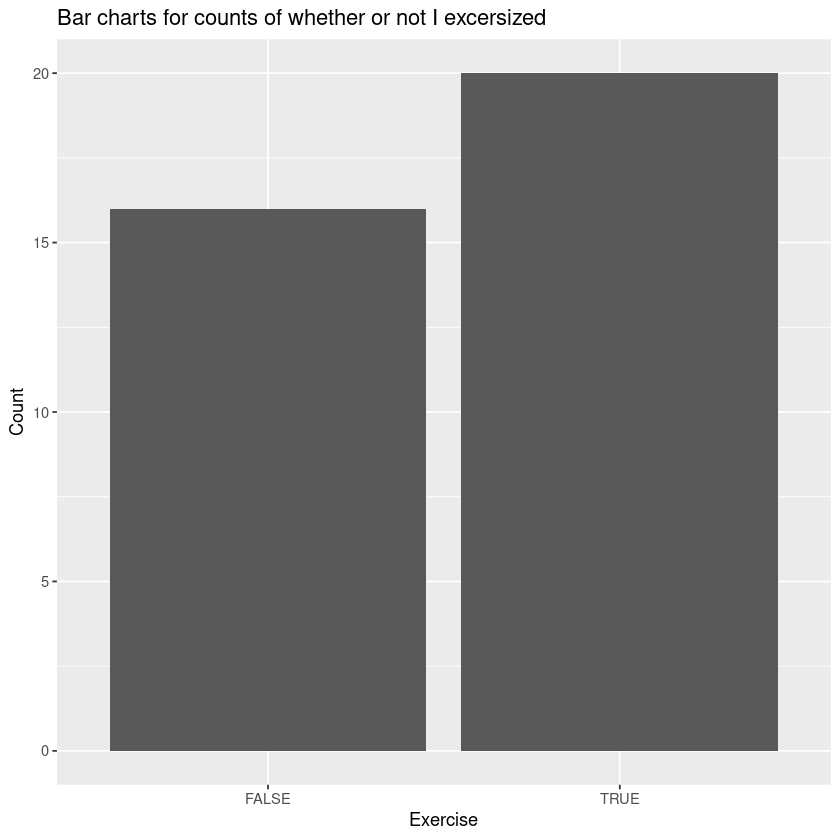

In [10]:
# Create a bar chart using ggplot2
my_log %>%
  ggplot(aes(x = Exercise)) + 
  geom_bar() +   
  labs(x="Exercise",y="Count",title="Bar charts for counts of whether or not I excersized")

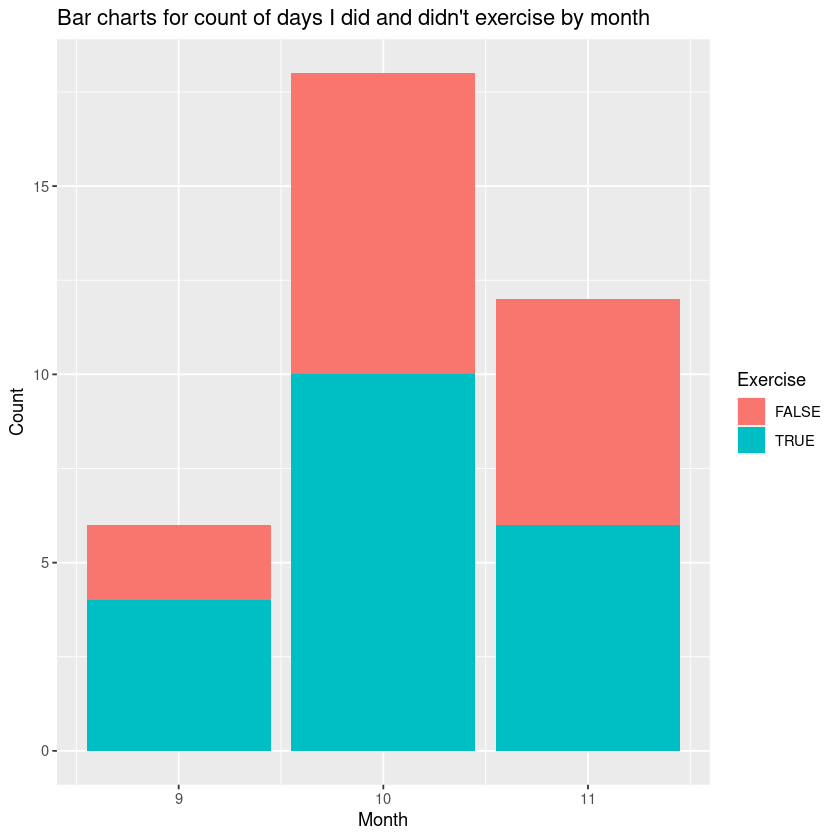

In [11]:
# Create a grouped bar chart using ggplot2
my_log %>%
  ggplot(aes(x = month, fill = Exercise)) +
  geom_bar() + 
  labs(x="Month",y="Count",title="Bar charts for count of days I did and didn't exercise by month")

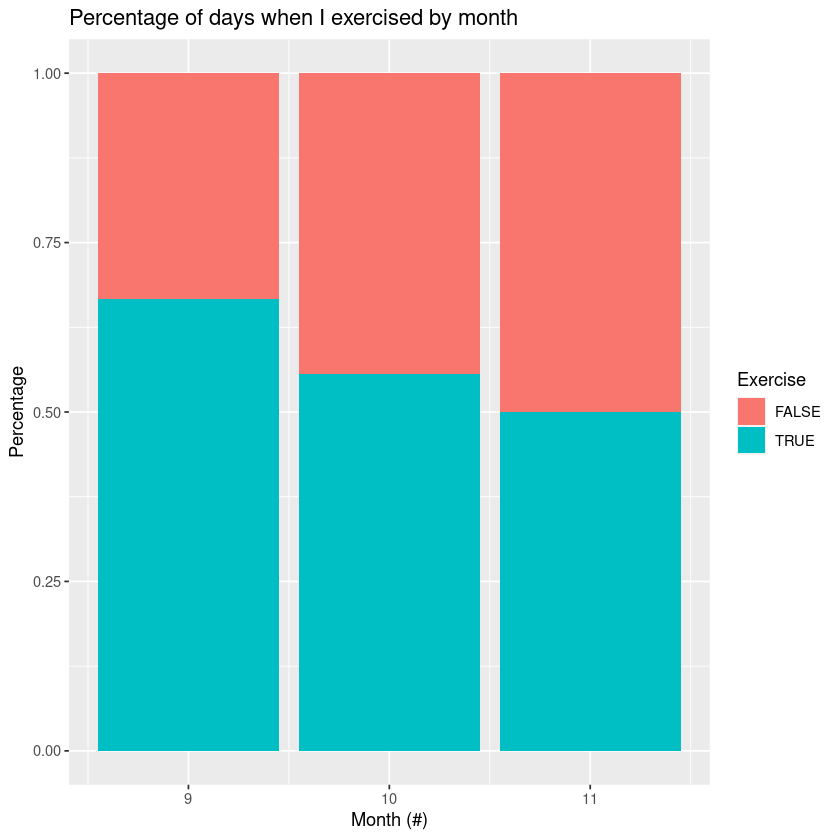

In [12]:
# Create a stacked bar chart using ggplot2
my_log %>%
  ggplot(aes(x = month, fill = Exercise)) +
  geom_bar(position = 'fill') + 
  labs(x="Month (#)",y="Percentage",title="Percentage of days when I exercised by month")

### Lots of Work


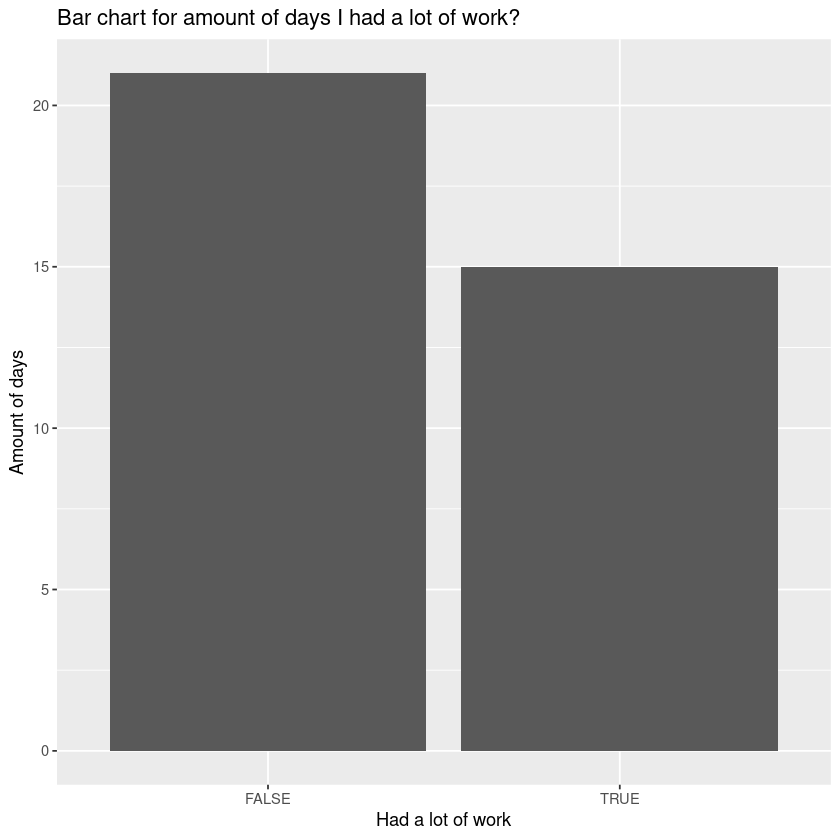

In [13]:
# Create a bar chart for the variable 'Have_a_lot_of_work'
my_log %>%
  ggplot(aes(x = Have_a_lot_of_work)) +
  geom_bar() +
  labs(x="Had a lot of work",y="Amount of days",title="Bar chart for amount of days I had a lot of work?")

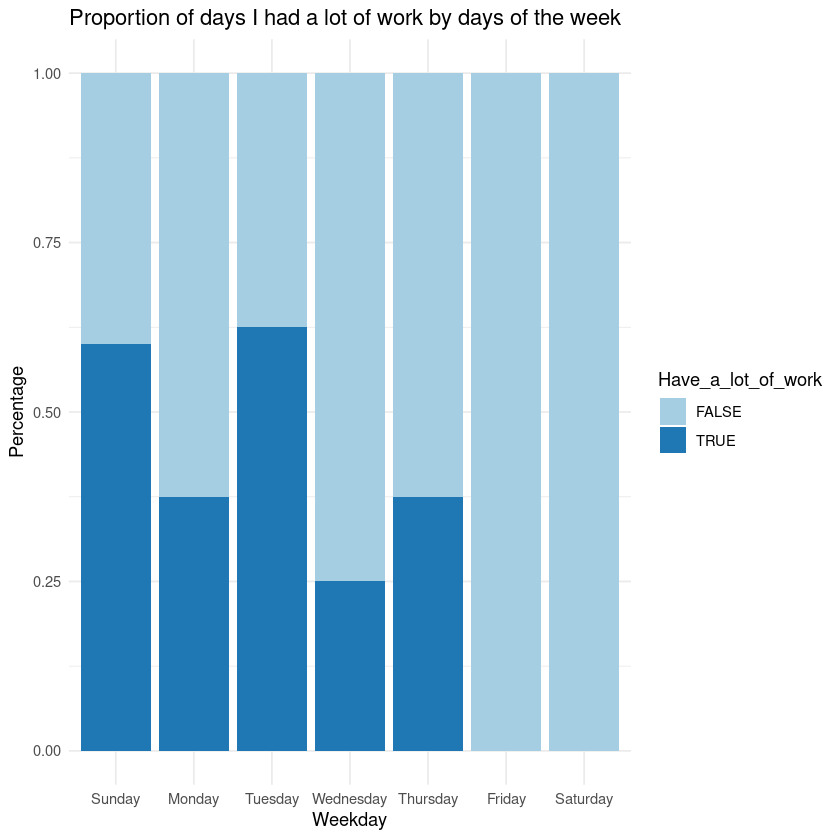

In [14]:
# Create a stacked bar chart with a different color palette
my_log %>%
  ggplot(aes(x = weekday, fill = Have_a_lot_of_work)) +
  geom_bar(position = 'fill') +
  
  # Add labels to the axes
  labs(x="Weekday", y="Percentage", title="Proportion of days I had a lot of work by days of the week") +
  
  # Apply a different color palette
  scale_fill_brewer(palette = "Paired") +
  theme_minimal()

### Drink Last Night

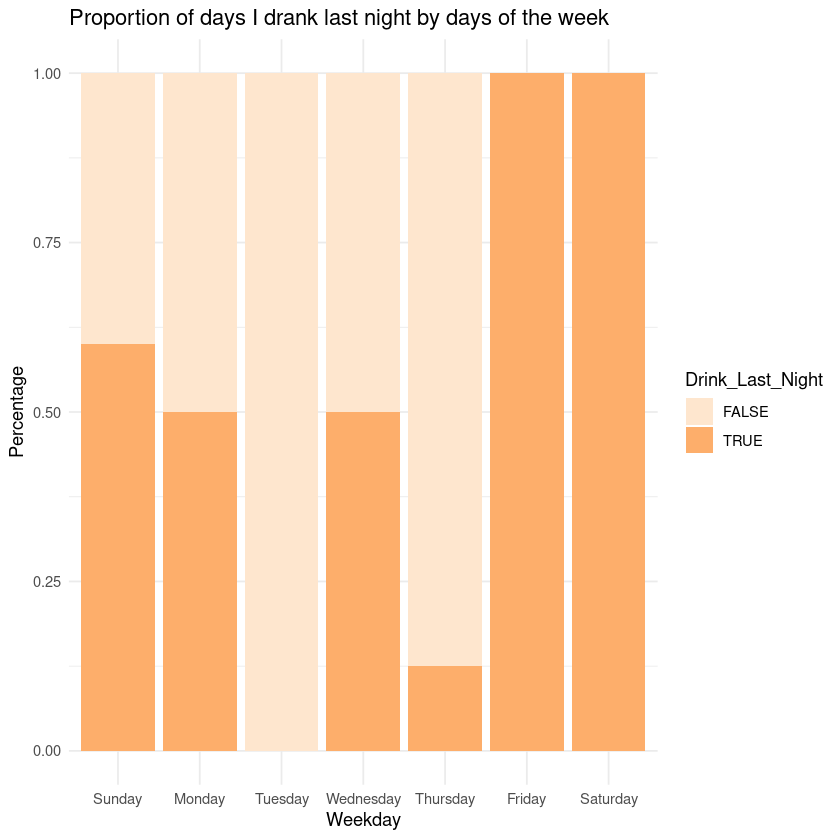

In [15]:
# Create a stacked bar chart with a different color palette
my_log %>%
  ggplot(aes(x = weekday, fill = Drink_Last_Night)) +
  geom_bar(position = 'fill') +
  
  # Add labels to the axes
  labs(x="Weekday", y="Percentage", title="Proportion of days I drank last night by days of the week") +  

  # Apply a different color palette
  scale_fill_brewer(palette = "Oranges") + 
  theme_minimal()


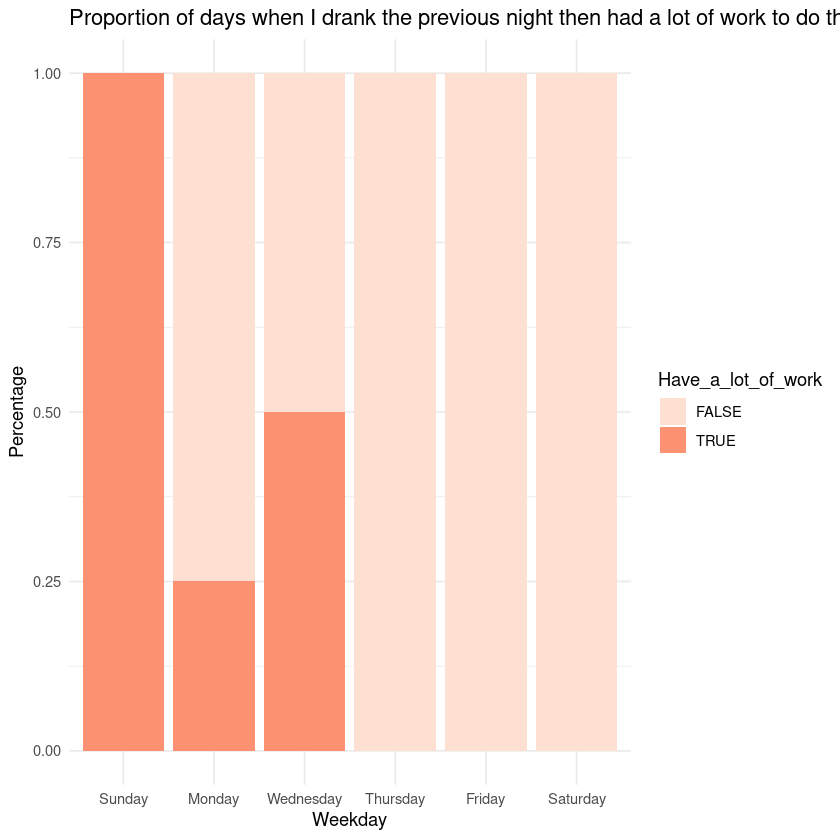

In [16]:
# Create a stacked bar chart with a different color palette
my_log %>%
  filter(Drink_Last_Night) %>%
  ggplot(aes(x = weekday, fill = Have_a_lot_of_work)) +
  geom_bar(position = 'fill') +
  
  # Add labels and title
  labs(x = "Weekday", y = "Percentage", title = "Proportion of days when I drank the previous night then had a lot of work to do that day") +
  
  # Apply a different color palette
  scale_fill_brewer(palette = "Reds") +
  theme_minimal()

### Sufficient Food + Hydration

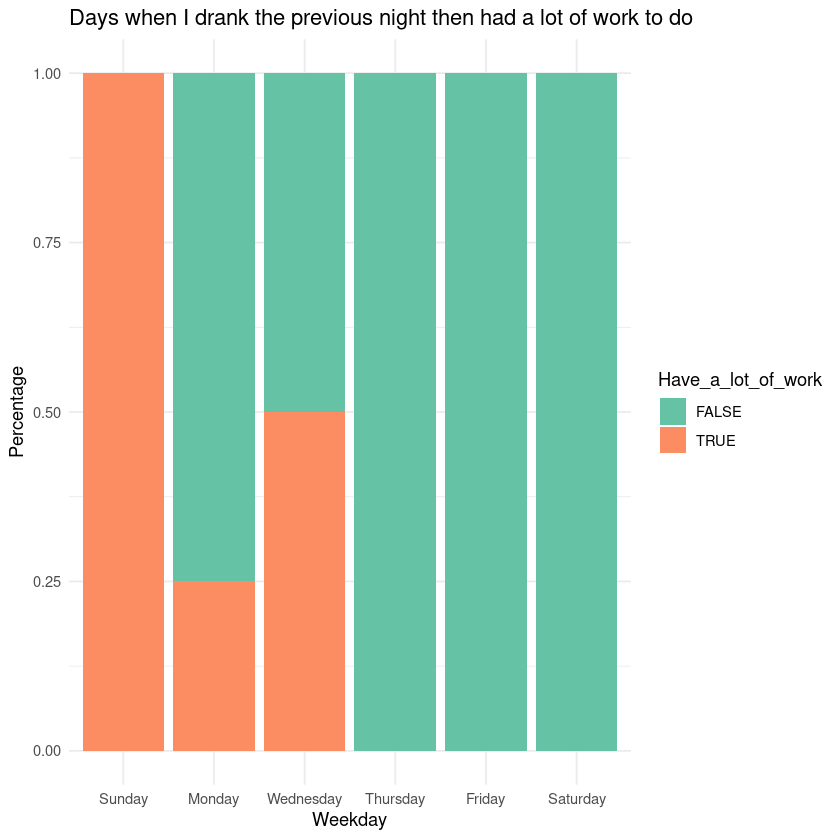

In [17]:
# Create a stacked bar chart with a different color palette
my_log %>%
  filter(Drink_Last_Night) %>%
  ggplot(aes(x = weekday, fill = Have_a_lot_of_work)) +
  geom_bar(position = 'fill') +
  
  # Add labels and title
  labs(x = "Weekday", y = "Percentage", title = "Days when I drank the previous night then had a lot of work to do") +
  
  # Apply a different color palette
  scale_fill_brewer(palette = "Set2") +
  theme_minimal()

### Less Than 8 hours

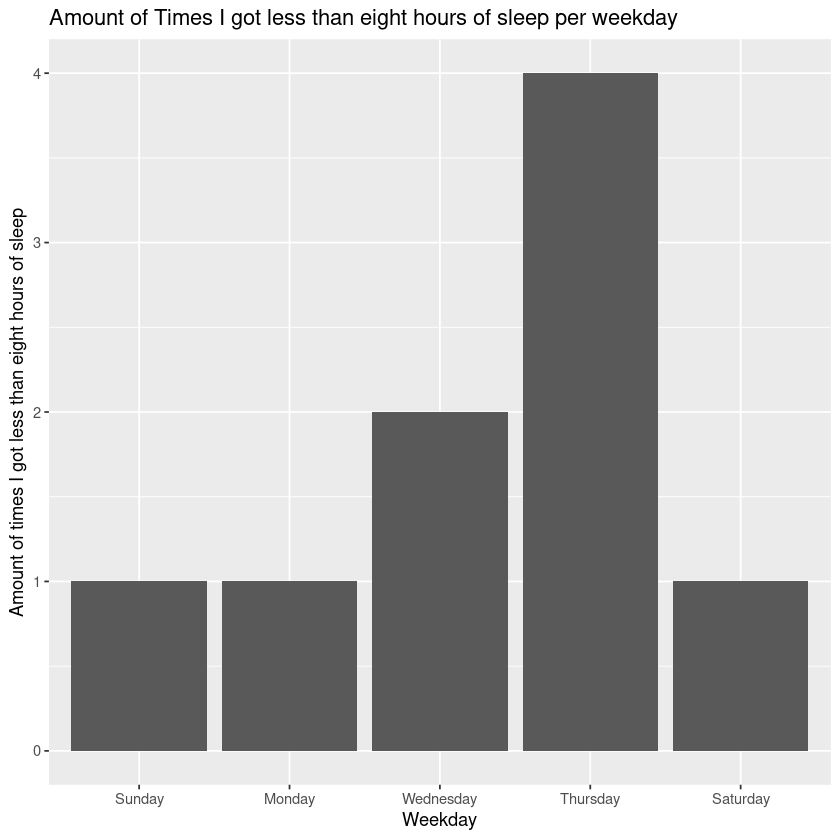

In [18]:
my_log %>%
    filter(Get_less_than_8_hours_of_sleep) %>% 
    ggplot(aes(x = weekday)) +
    geom_bar() +
    labs(x="Weekday", y="Amount of times I got less than eight hours of sleep", title="Amount of Times I got less than eight hours of sleep per weekday")

### Enjoyed the Weather

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


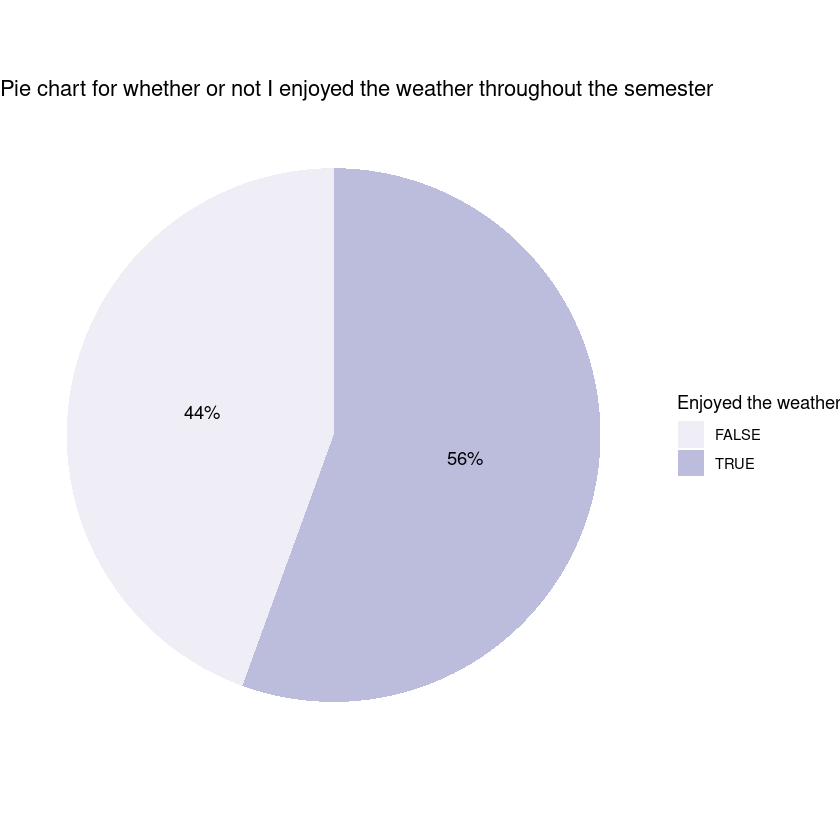

In [19]:
# Create a pie chart with percentage labels and a new color palette
my_log %>%
  ggplot(aes(x = "", fill = Enjoy_the_weather)) +
  geom_bar() +
  labs(title = "Pie chart for whether or not I enjoyed the weather throughout the semester") +
  coord_polar(theta = "y") +
  theme_void() +
  
  # Add percentage labels to the chart
  geom_text(aes(label = scales::percent(..count../sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  
  # Apply a different color palette
  scale_fill_brewer(palette = "Purples") +  # You can choose a palette from the list
  labs(fill = "Enjoyed the weather")

## Continuous Variables

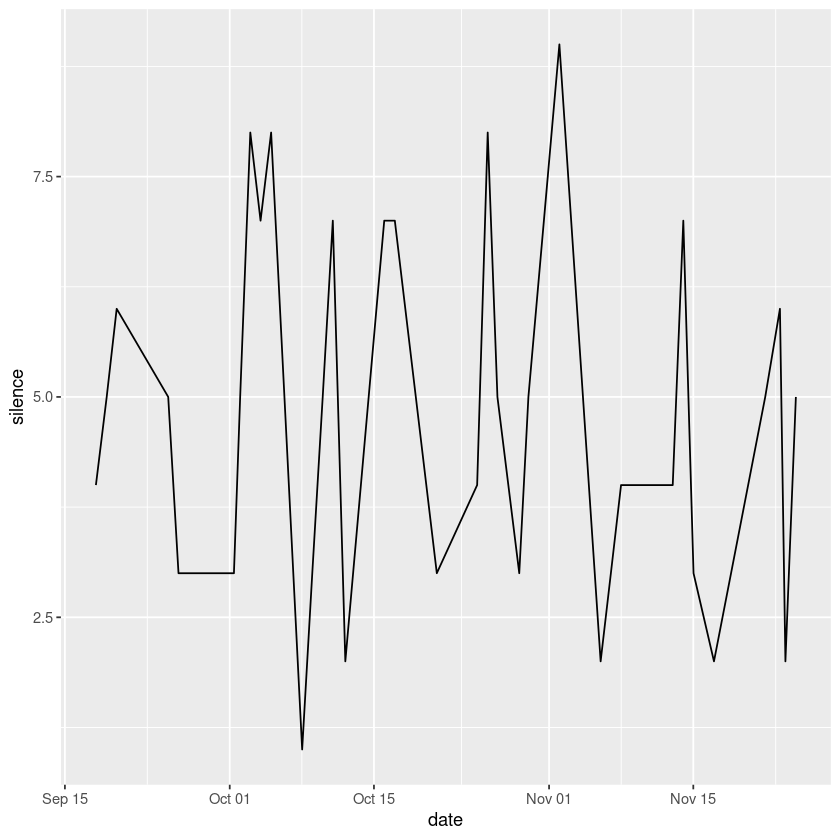

In [20]:
my_log %>%
        ggplot(aes(x=date, y=silence)) +
            geom_line() 

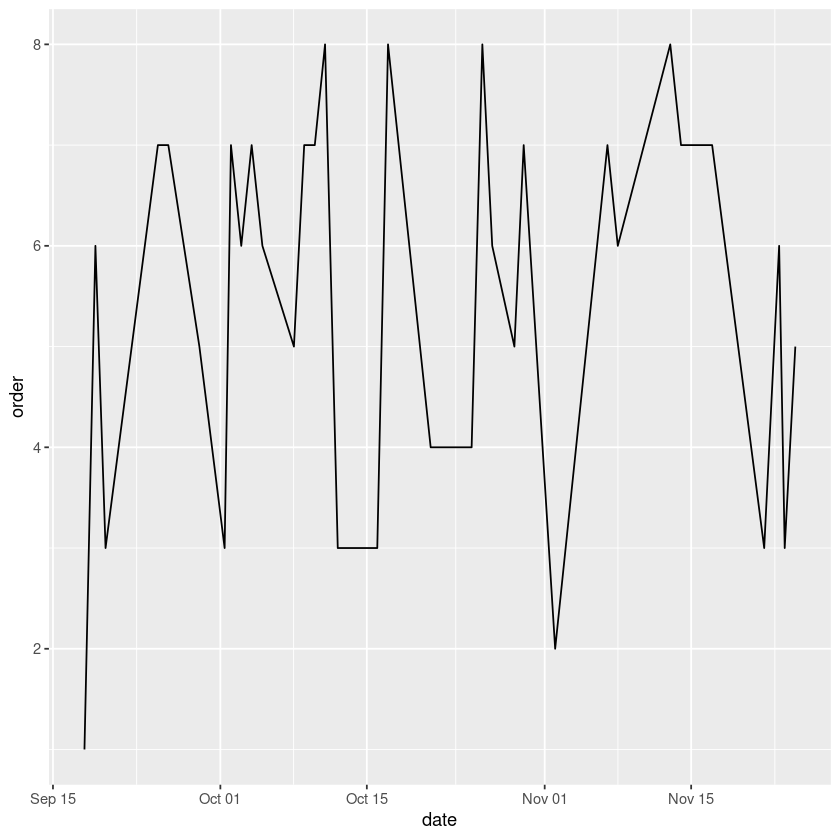

In [21]:
my_log %>%
        ggplot(aes(x=date, y=order)) +
            geom_line() 

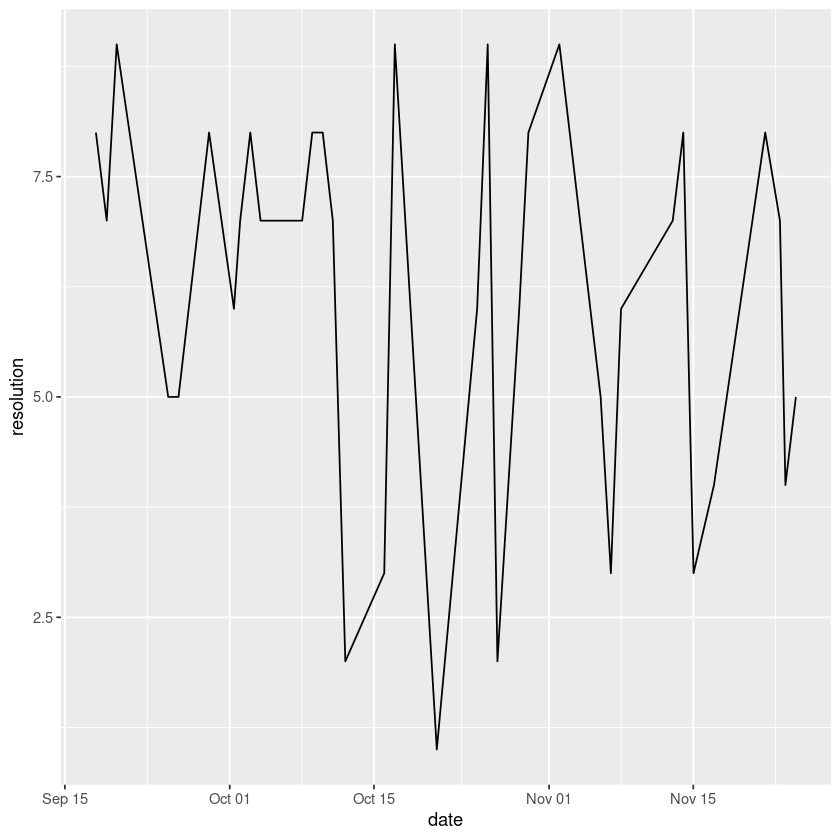

In [22]:
my_log %>%
        ggplot(aes(x=date, y=resolution)) +
            geom_line() 

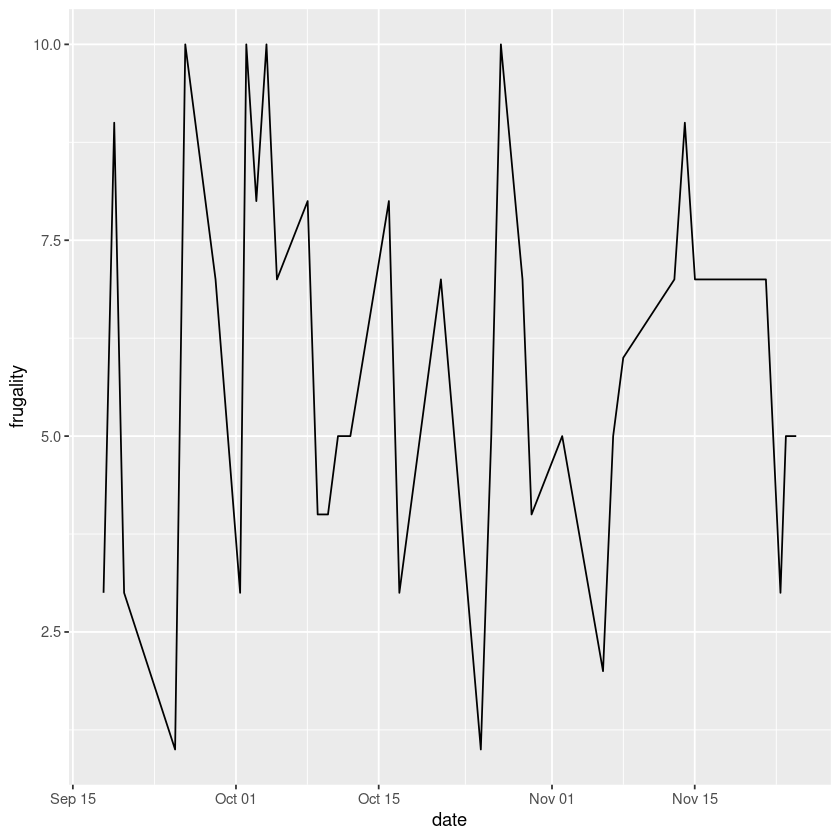

In [23]:
my_log %>%
        ggplot(aes(x=date, y=frugality)) +
            geom_line() 

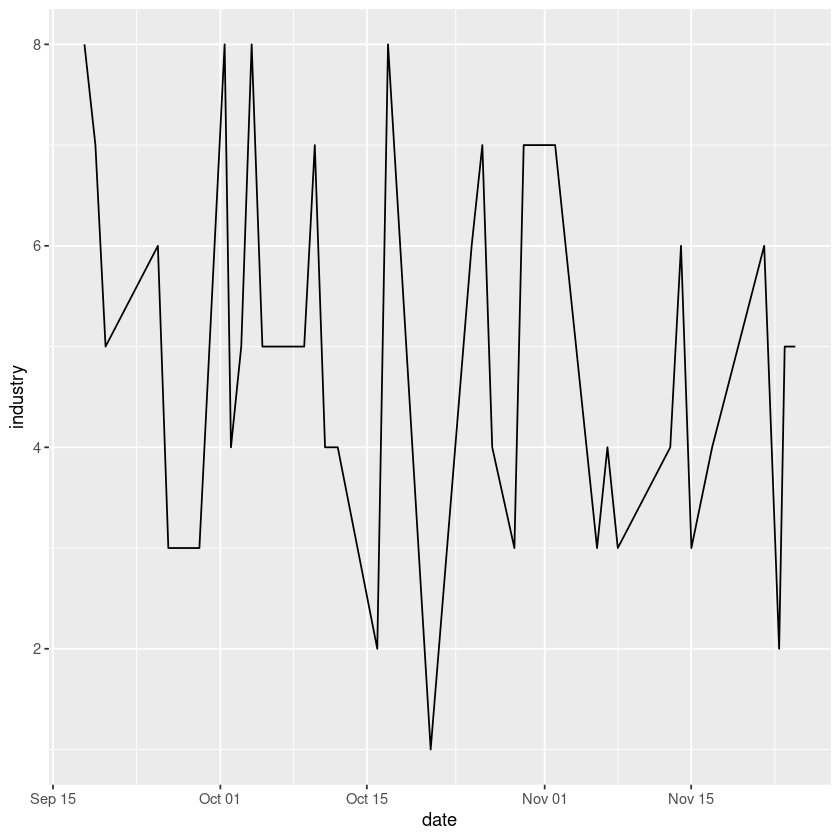

In [24]:
my_log %>%
        ggplot(aes(x=date, y=industry)) +
            geom_line() 

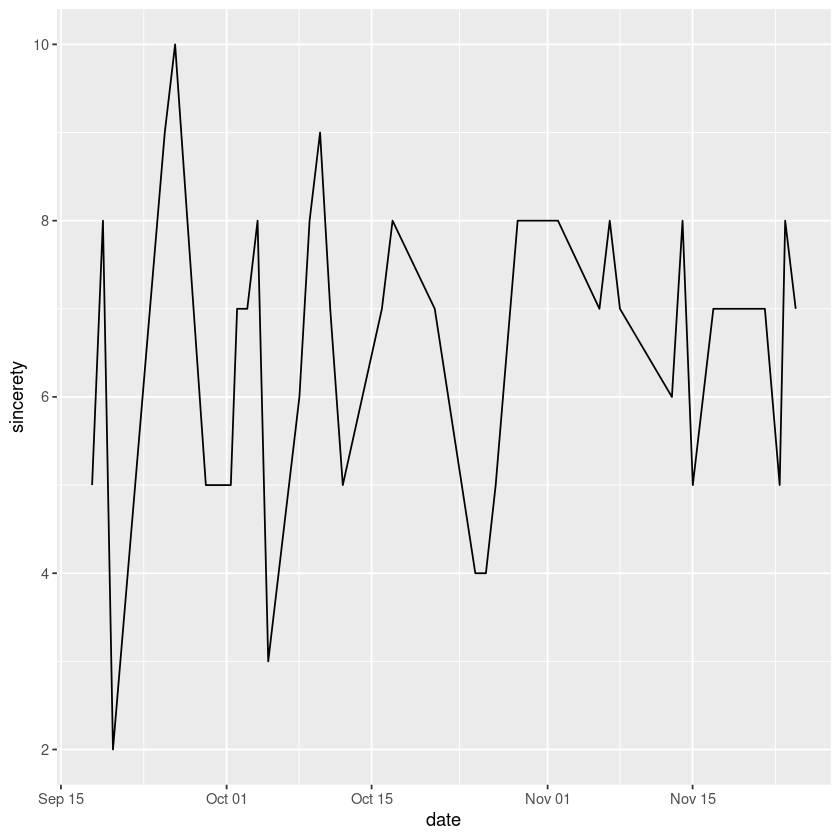

In [25]:
my_log %>%
        ggplot(aes(x=date, y=sincerety)) +
            geom_line() 

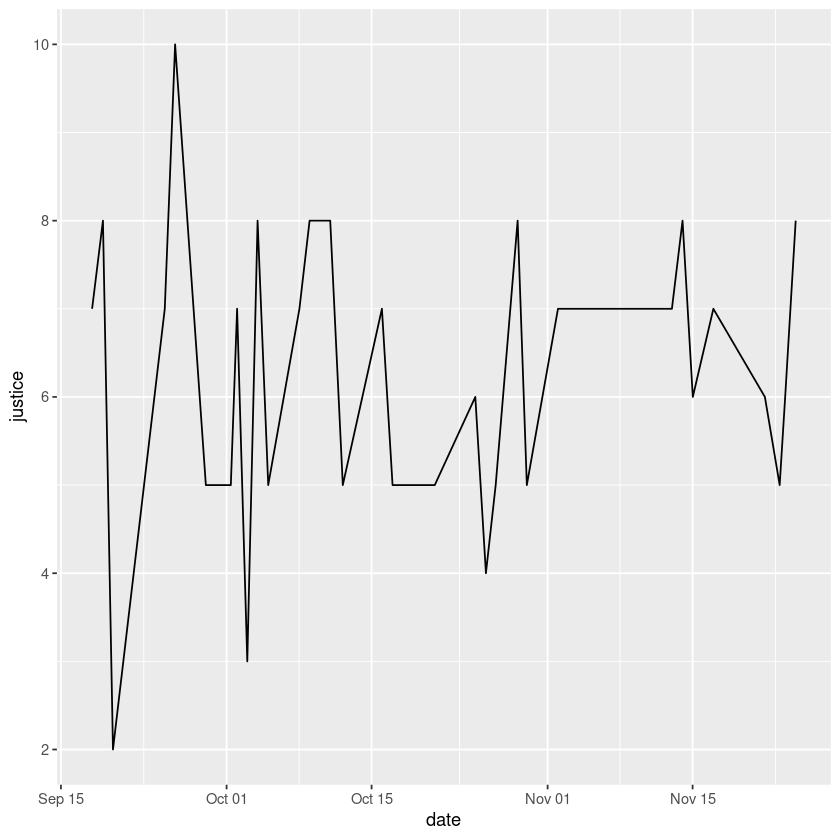

In [26]:
my_log %>%
        ggplot(aes(x=date, y=justice)) +
            geom_line() 

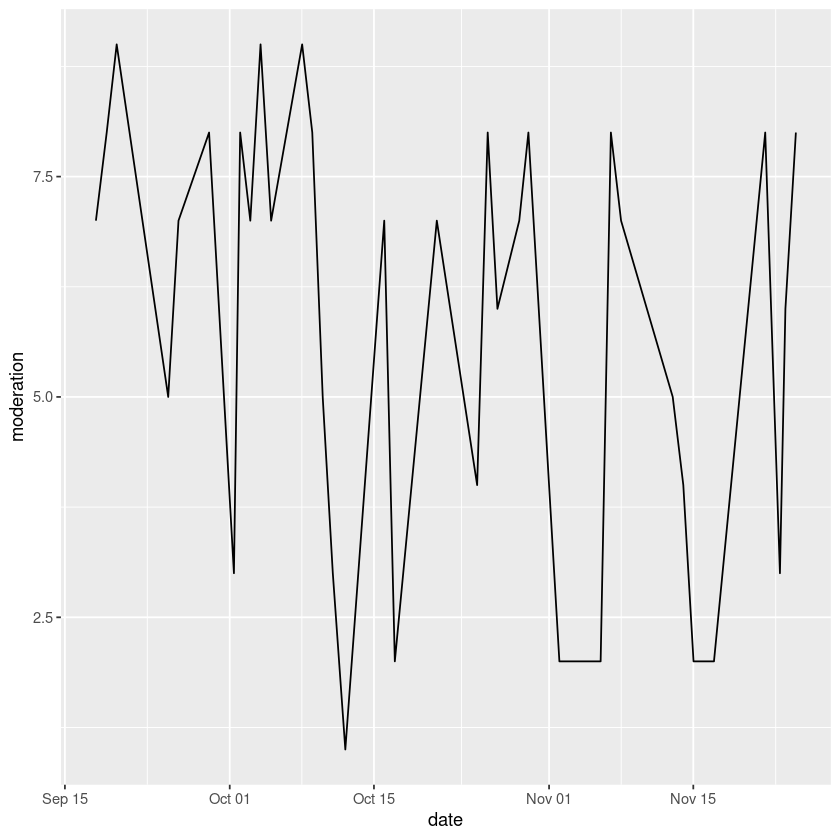

In [27]:
my_log %>%
        ggplot(aes(x=date, y=moderation)) +
            geom_line() 

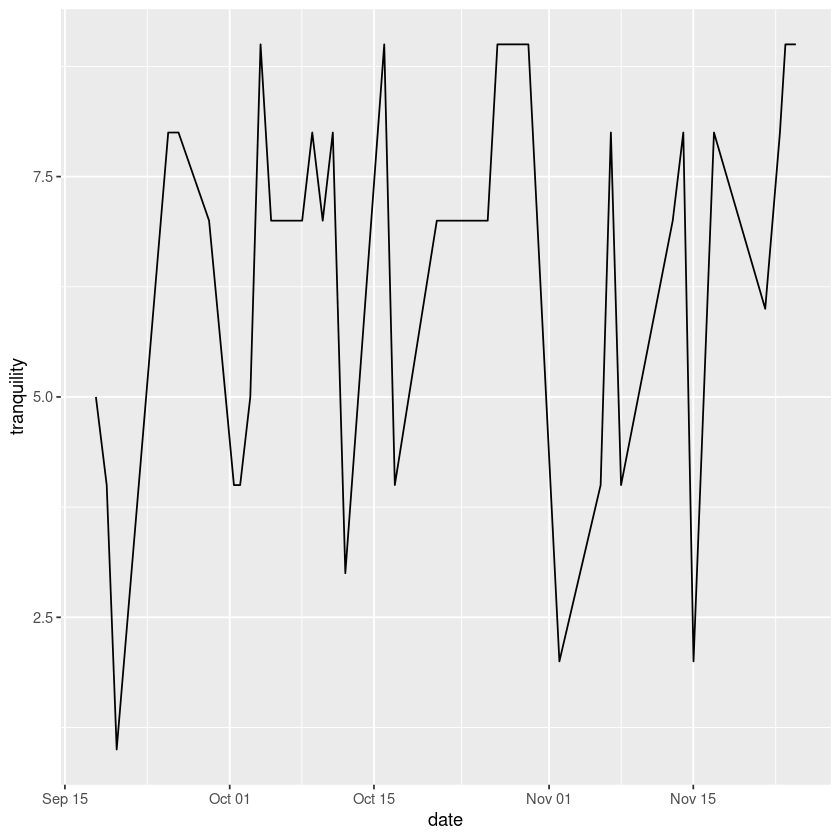

In [28]:
my_log %>%
        ggplot(aes(x=date, y=tranquility)) +
            geom_line() 

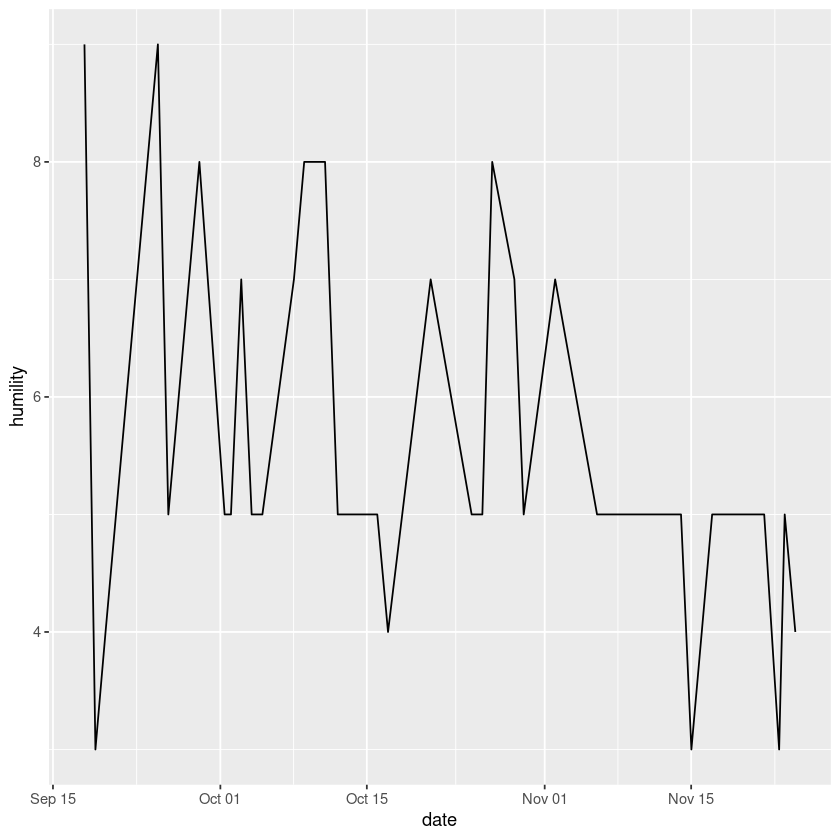

In [29]:
my_log %>%
        ggplot(aes(x=date, y=humility)) +
            geom_line() 

In [30]:
# take the means of each of the continuous variables
my_log %>%
    summarise(avg_resolution = mean(resolution),
              avg_silence = mean(silence),
              avg_order = mean(order),
              avg_resolution = mean(resolution),
              avg_frugality = mean(frugality),
              avg_industry = mean(industry),
              avg_sincerety = mean(sincerety),
              avg_justice = mean(justice),
              avg_moderation = mean(moderation),
              avg_tranquility = mean(tranquility),
              avg_humility = mean(humility))

avg_resolution,avg_silence,avg_order,avg_frugality,avg_industry,avg_sincerety,avg_justice,avg_moderation,avg_tranquility,avg_humility
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.166667,4.694444,5.555556,5.833333,4.916667,6.611111,6.361111,5.833333,6.416667,5.666667


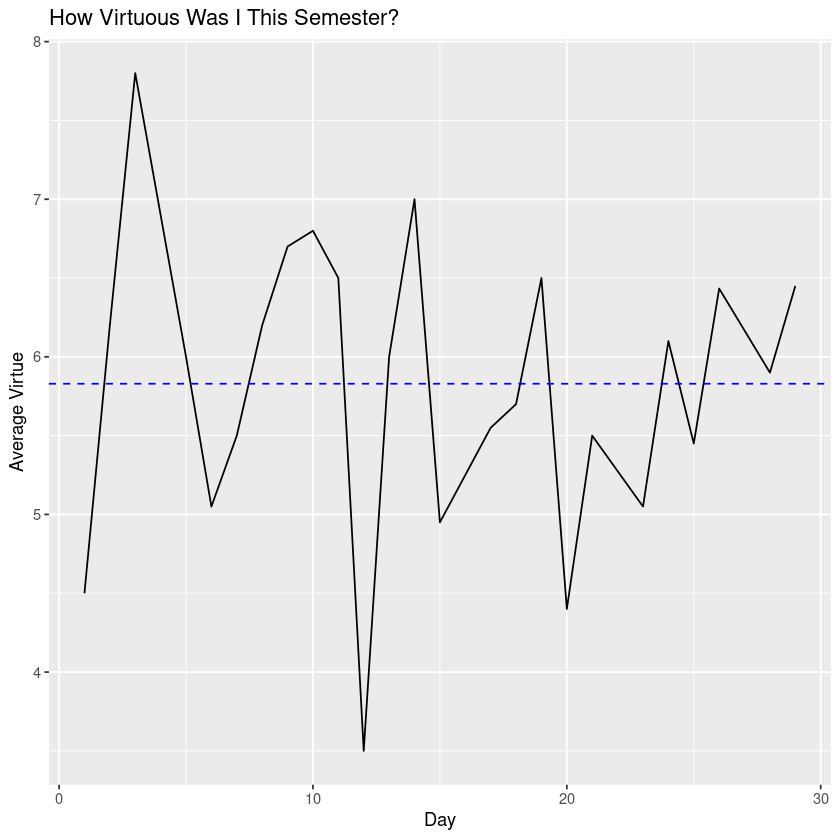

In [52]:
# Calculate the mean for each of the ten variables and store them in a new column
my_log$mean_of_vars <- rowMeans(my_log[, c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")])

# Group by day and calculate the mean of means for each day and store them in a new DF
daily_avg_virtue <- my_log %>%
  group_by(day) %>%
  summarise(mean_of_means = mean(mean_of_vars))

# Calculate the overall mean of means
overall_mean <- mean(daily_avg_virtue$mean_of_means)

# Plot the mean of means by day
daily_avg_virtue %>%
  ggplot(aes(x = day, y = mean_of_means)) +
  geom_line() +
  geom_hline(yintercept = overall_mean, linetype = "dashed", color = "blue") +  # Add horizontal line at the overall mean
  labs(x = "Day", y = "Average Virtue", title = "How Virtuous Was I This Semester?")

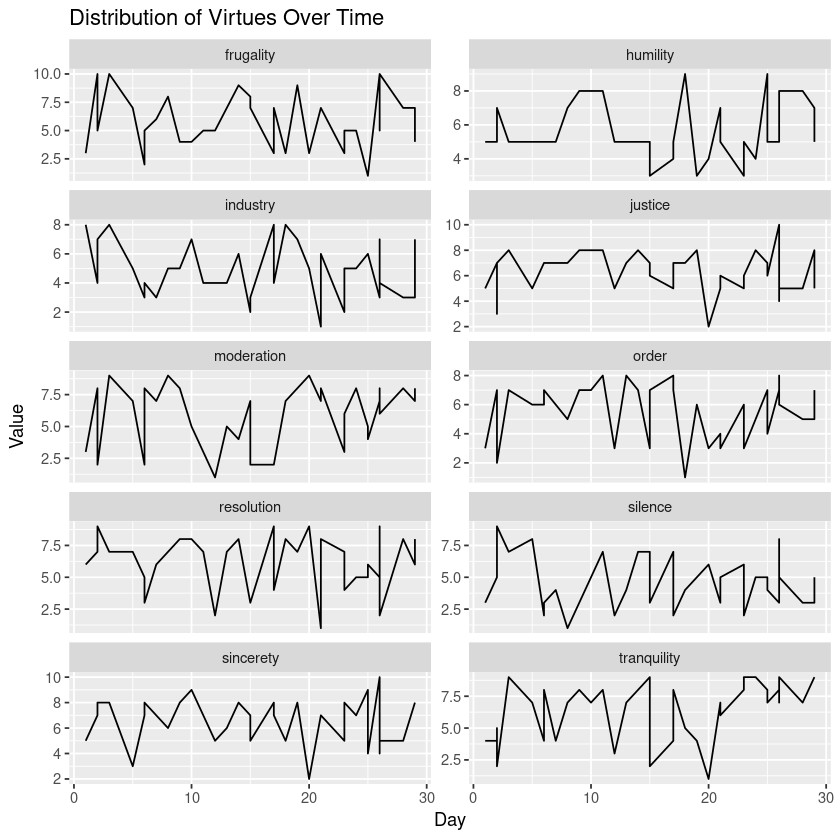

In [32]:
# Create a vector of variable names to plot
variables_to_plot <- c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")

# Filter the variable names to include only those that exist in the 'my_log' dataframe
variables_to_plot <- variables_to_plot[variables_to_plot %in% names(my_log)]

# Check if there are valid variables to plot
if (length(variables_to_plot) > 0) {
  
  # Reshape the 'my_log' dataframe from wide to long format using the 'gather' function
  my_log_melted <- gather(my_log, key = "variable", value = "value", all_of(variables_to_plot))
  
  # Create a line plot using 'ggplot2' library
  ggplot(my_log_melted, aes(x = day, y = value)) +
    geom_line() +  # Add a line geometry
    facet_wrap(~variable, scales = "free_y", ncol = 2) +  # Create multiple plots in a grid
    labs(x = "Day", y = "Value") +  # Label the axes
    ggtitle("Distribution of Virtues Over Time")  # Set the plot title
} else {
  # If there are no valid variables to plot, print a message
  cat("No valid variables found in the dataframe.")
}


In [33]:
mean_of_means <- my_log %>%
  summarise(avg_resolution = mean(resolution),
            avg_silence = mean(silence),
            avg_order = mean(order),
            avg_frugality = mean(frugality),
            avg_industry = mean(industry),
            avg_sincerety = mean(sincerety),
            avg_justice = mean(justice),
            avg_moderation = mean(moderation),
            avg_tranquility = mean(tranquility),
            avg_humility = mean(humility)) %>%
  summarise(mean_of_means = mean(c(avg_resolution, avg_silence, avg_order, avg_frugality, avg_industry, avg_sincerety, avg_justice, avg_moderation, avg_tranquility, avg_humility)))

# Print the mean of means as "Total Virtue"
cat("Total Virtue:", mean_of_means$mean_of_means)


Total Virtue: 5.805556

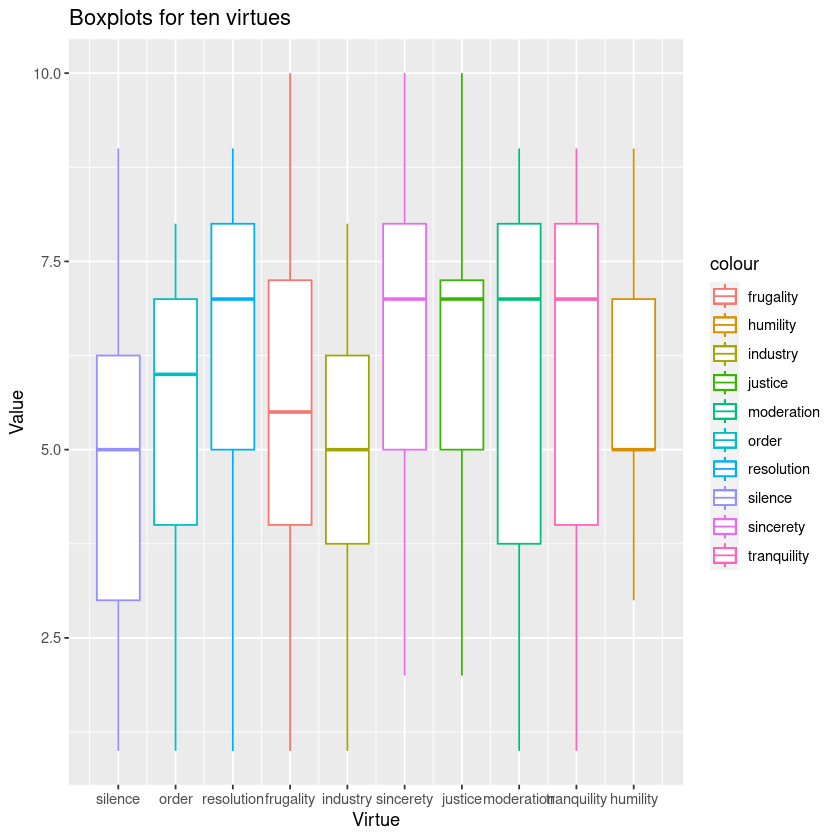

In [34]:
# Creating a numeric sequence to place each boxplot
x_positions <- seq(1, length.out = 10, by = 1)

# Adding a boxplot layers for the variables
ggplot(my_log) +
    geom_boxplot(aes(y = silence, x = x_positions[1], colour = "silence")) +
    geom_boxplot(aes(y = order, x = x_positions[2], colour = "order")) +
    geom_boxplot(aes(y = resolution, x = x_positions[3], colour = "resolution")) +
    geom_boxplot(aes(y = frugality, x = x_positions[4], colour = "frugality")) +
    geom_boxplot(aes(y = industry, x = x_positions[5], colour = "industry")) +
    geom_boxplot(aes(y = sincerety, x = x_positions[6], colour = "sincerety")) +
    geom_boxplot(aes(y = justice, x = x_positions[7], colour = "justice")) +
    geom_boxplot(aes(y = moderation, x = x_positions[8], colour = "moderation")) +
    geom_boxplot(aes(y = tranquility, x = x_positions[9], colour = "tranquility")) +
    geom_boxplot(aes(y = humility, x = x_positions[10], colour = "humility")) +
    
    # Setting breaks and labels for the x-axis
    scale_x_continuous(breaks = x_positions, labels = c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")) +
    labs(x="Virtue", y="Value", title="Boxplots for ten virtues")


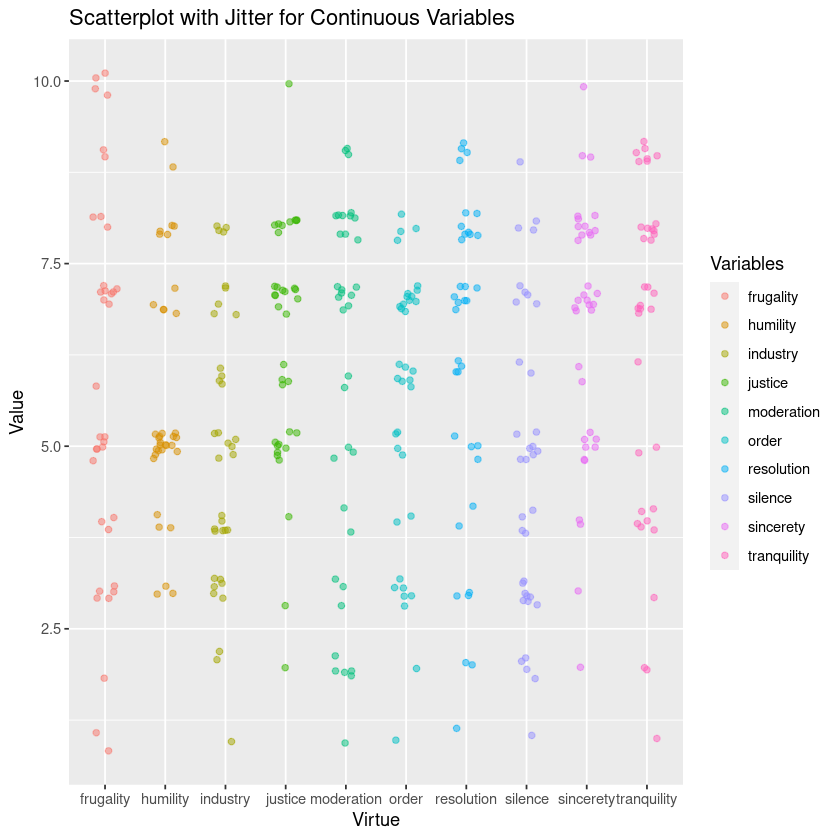

In [35]:
# Assuming your dataframe is called my_log
variables_to_plot <- c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")

# Filter the list of variables to only include those that exist in the dataframe
variables_to_plot <- variables_to_plot[variables_to_plot %in% names(my_log)]

# Check if any variables exist in the dataframe
if (length(variables_to_plot) > 0) {
  # Melt the data into long format for easy plotting
  my_log_melted <- gather(my_log, key = "variable", value = "value", all_of(variables_to_plot))
  
  # Create a scatterplot with jitter, color coding, and alpha
  ggplot(my_log_melted, aes(x = variable, y = value, color = variable)) +
    geom_jitter(width = 0.2, height = 0.2, alpha = 0.5) +
    labs(x = "Virtue", y = "Value") +
    ggtitle("Scatterplot with Jitter for Continuous Variables") +
    scale_color_discrete(name = "Variables")
} else {
  cat("No valid variables found in the dataframe.")
}

## Data Questions

### On what days of the week is my Resolution highest?

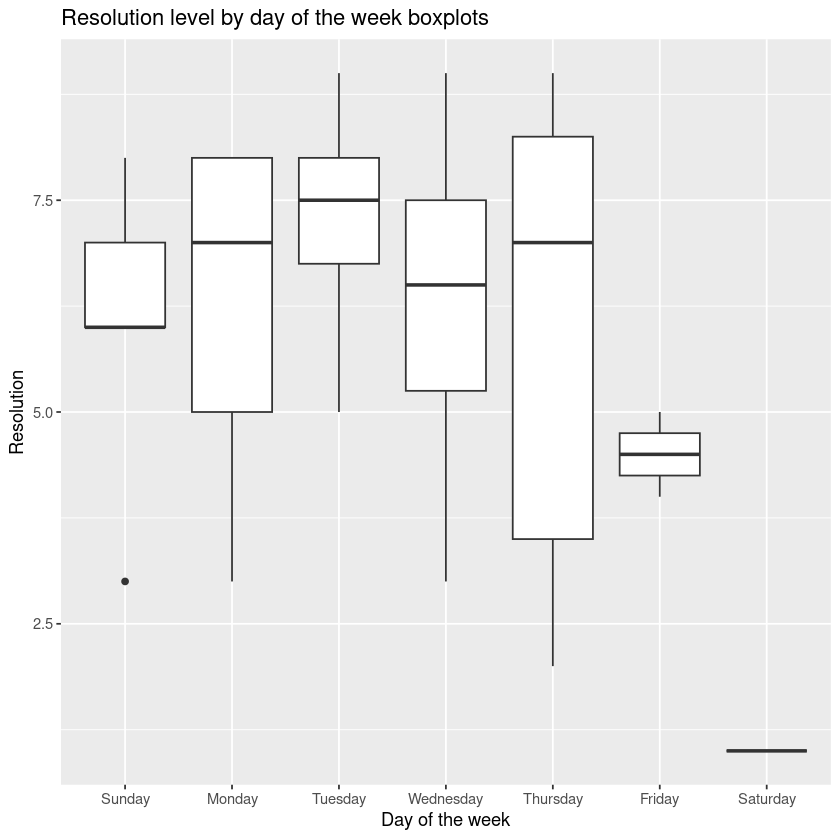

In [36]:
my_log %>%
    ggplot( aes(x= as_factor(weekday), y=resolution)) +
    geom_boxplot() +
    labs(x = "Day of the week", y = "Resolution", title = "Resolution level by day of the week boxplots")

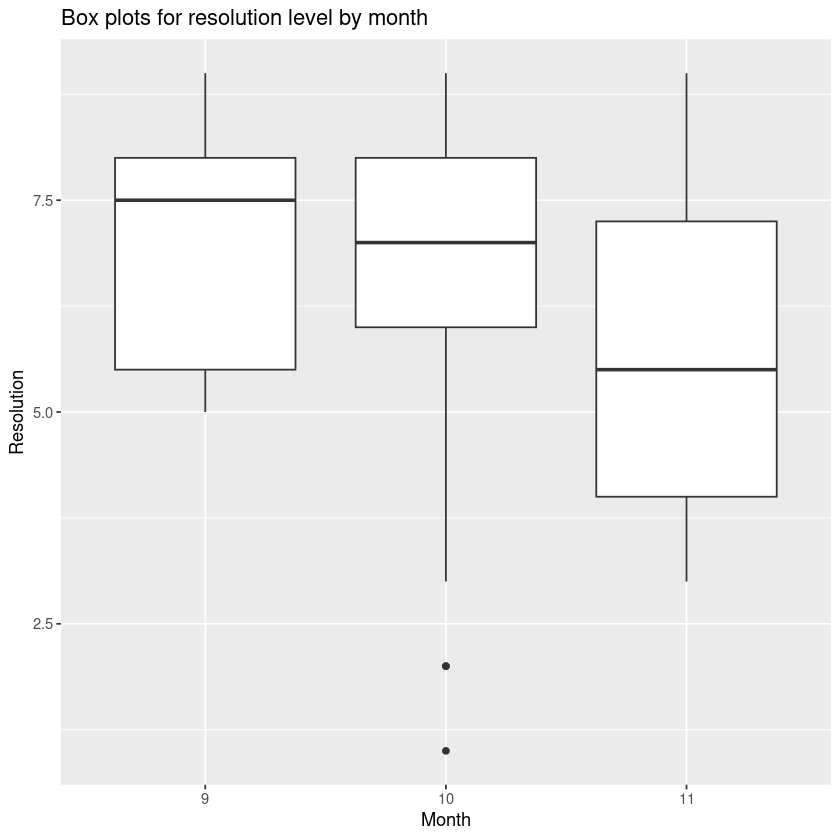

In [37]:
my_log %>%
    ggplot( aes(x= as_factor(month), y=resolution)) +
    geom_boxplot()+
    labs(x="Month",y="Resolution",title="Box plots for resolution level by month")

### Is Exercising Associated With Order?

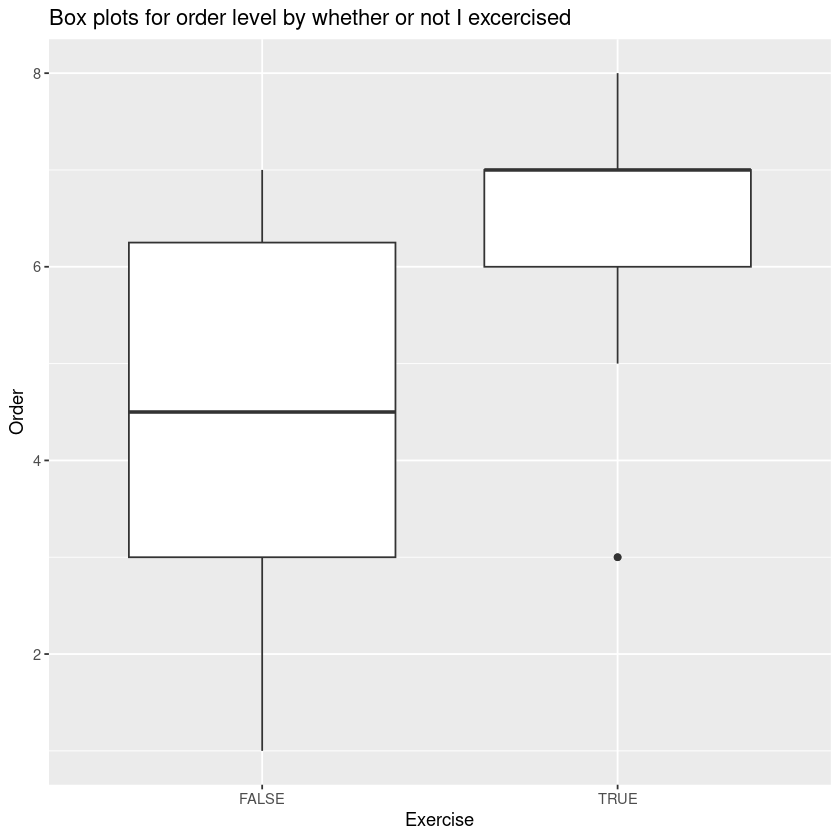

In [38]:
my_log %>%
    ggplot(aes(x=Exercise, y=order)) +
    geom_boxplot() +
    labs(x="Exercise",y="Order",title="Box plots for order level by whether or not I excercised")

### Is Getting Less than 8 hours of sleep associated with Sincerity?

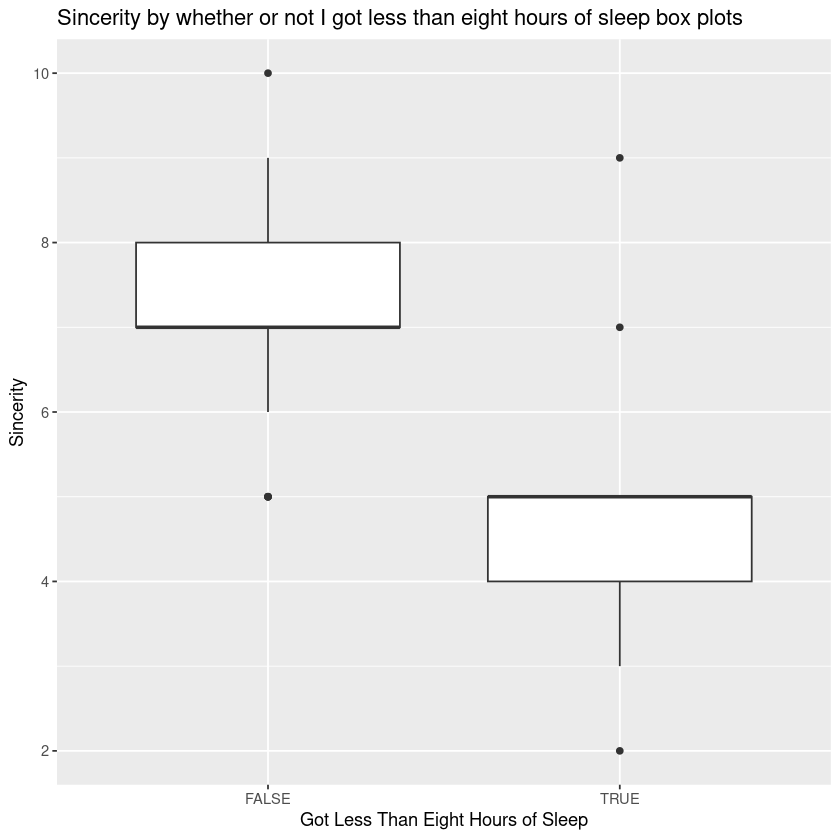

In [39]:
my_log %>%
    ggplot(aes(x=(Get_less_than_8_hours_of_sleep), y=sincerety)) +
    geom_boxplot() + 
    labs(x = "Got Less Than Eight Hours of Sleep", y = "Sincerity", title = "Sincerity by whether or not I got less than eight hours of sleep box plots")

### Is Having Drank Last Night Associated with Lower Resolution?

In [40]:
my_log %>%
    select(Drink_Last_Night, resolution) %>%
    head(5)

Drink_Last_Night,resolution
<lgl>,<dbl>
TRUE,8
FALSE,7
FALSE,9
TRUE,5
FALSE,5


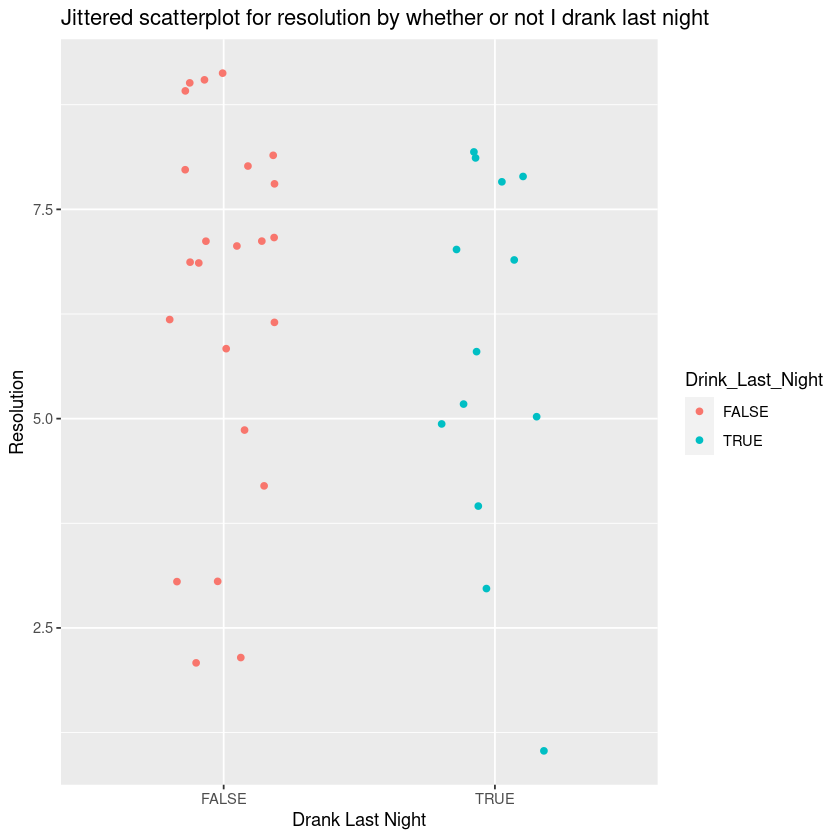

In [41]:
my_log %>%
    ggplot( aes(x=Drink_Last_Night, y=resolution, color = Drink_Last_Night)) +
    geom_jitter(width = 0.2, height = 0.2) +
    labs(x = "Drank Last Night", y = "Resolution", title = "Jittered scatterplot for resolution by whether or not I drank last night")

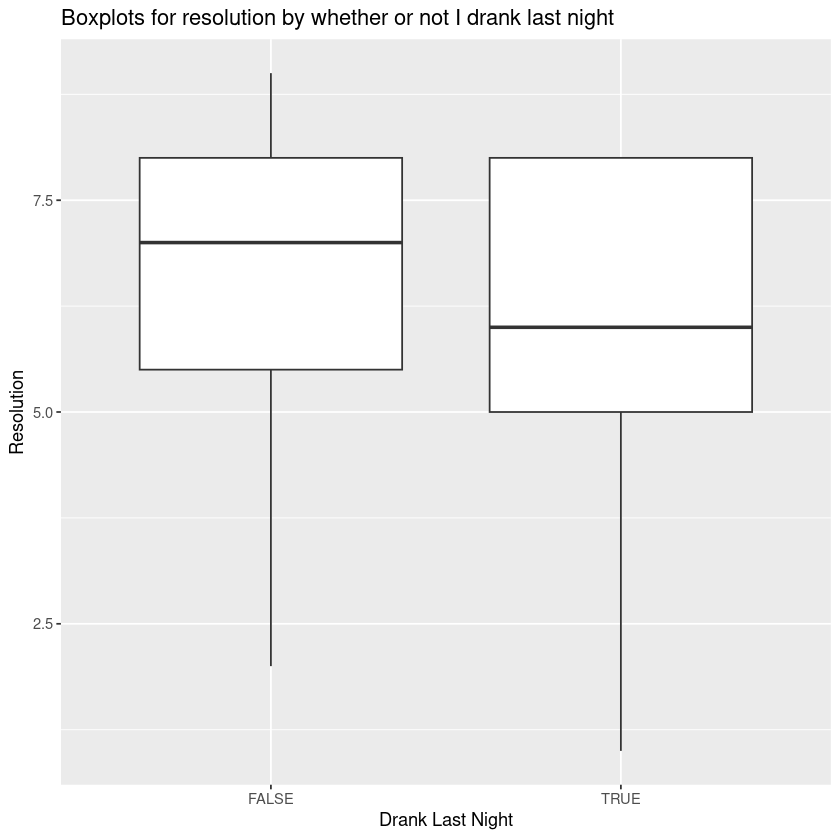

In [42]:
my_log %>%
    ggplot(aes(x=(Drink_Last_Night), y=resolution)) +
    geom_boxplot() +
    labs(x = "Drank Last Night", y = "Resolution", title = "Boxplots for resolution by whether or not I drank last night")

### Is Tranquility Negatively Associated with Industry?

In [43]:
my_log %>%
    select(tranquility, industry) %>%
    head(5)

tranquility,industry
<dbl>,<dbl>
5,8
4,7
1,5
8,6
8,3


`geom_smooth()` using formula = 'y ~ x'


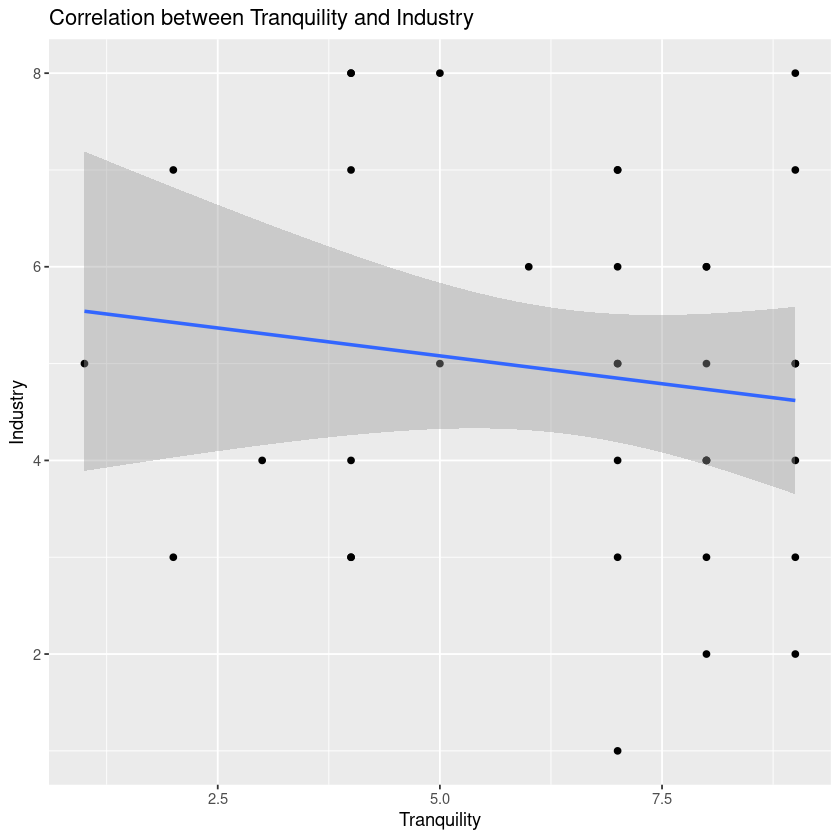

In [44]:
my_log %>%
    ggplot (aes(x =tranquility, y = industry)) +
    geom_point() +
    geom_smooth(method= "lm") + 
    labs(x = "Tranquility", y = "Industry", title = "Correlation between Tranquility and Industry")

### Is Order Correlated with Tranquility?

In [45]:
model <- lm(order~tranquility, data =my_log)
summary(model)


Call:
lm(formula = order ~ tranquility, data = my_log)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2203 -1.3787  0.8064  1.0698  3.0163 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0371     0.9172   4.401 0.000101 ***
tranquility   0.2366     0.1346   1.758 0.087793 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.85 on 34 degrees of freedom
Multiple R-squared:  0.0833,	Adjusted R-squared:  0.05634 
F-statistic:  3.09 on 1 and 34 DF,  p-value: 0.08779


`geom_smooth()` using formula = 'y ~ x'


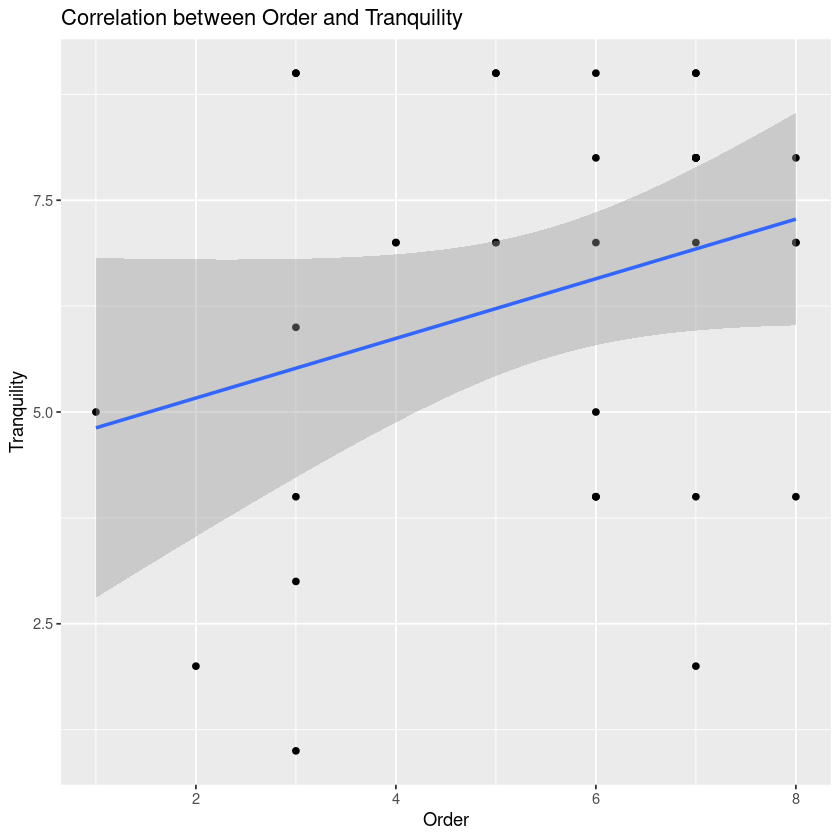

In [46]:
my_log %>%
    ggplot (aes(x =order, y = tranquility)) +
    geom_point() +
    geom_smooth(method= "lm") +
    labs(x = "Order", y = "Tranquility", title = "Correlation between Order and Tranquility")

### Is Moderation Correlated with Frugality?

In [47]:
model <- lm(moderation~frugality, data =my_log)
summary(model)


Call:
lm(formula = moderation ~ frugality, data = my_log)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5447 -1.8521  0.5895  1.7626  4.1479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.8131     0.9768   3.904 0.000426 ***
frugality     0.3463     0.1536   2.255 0.030704 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.334 on 34 degrees of freedom
Multiple R-squared:  0.1301,	Adjusted R-squared:  0.1045 
F-statistic: 5.084 on 1 and 34 DF,  p-value: 0.0307


`geom_smooth()` using formula = 'y ~ x'


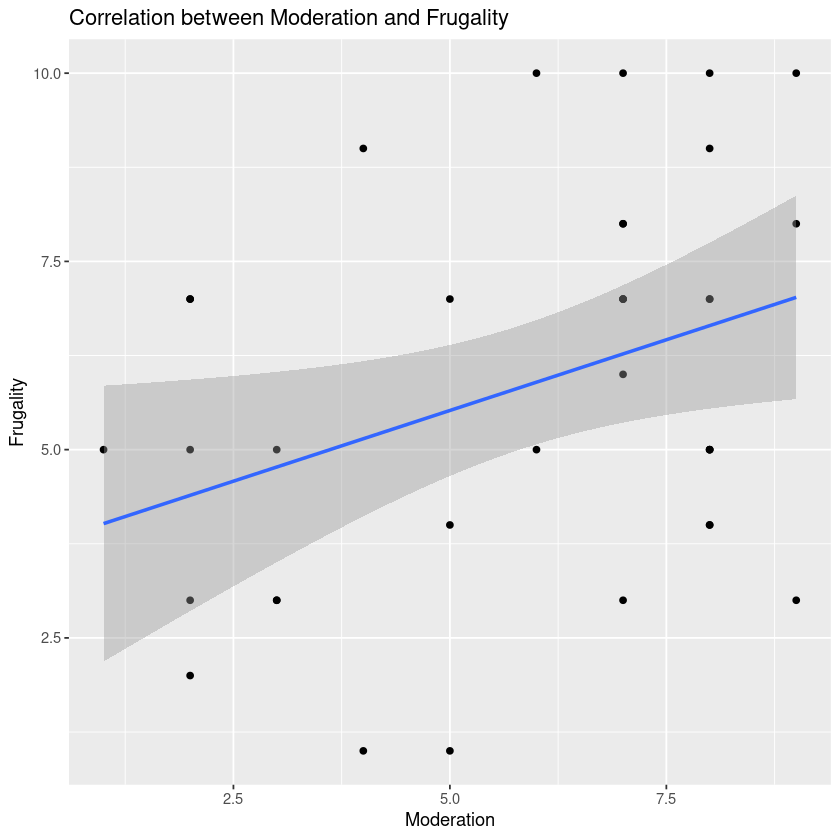

In [48]:
my_log %>%
    ggplot (aes(x =moderation, y = frugality)) +
    geom_point() +
    geom_smooth(method= "lm") +
    labs(x = "Moderation", y = "Frugality", title = "Correlation between Moderation and Frugality")

### Am I Less Virtuous on Days that I didn't Eat properly or Hydrate?

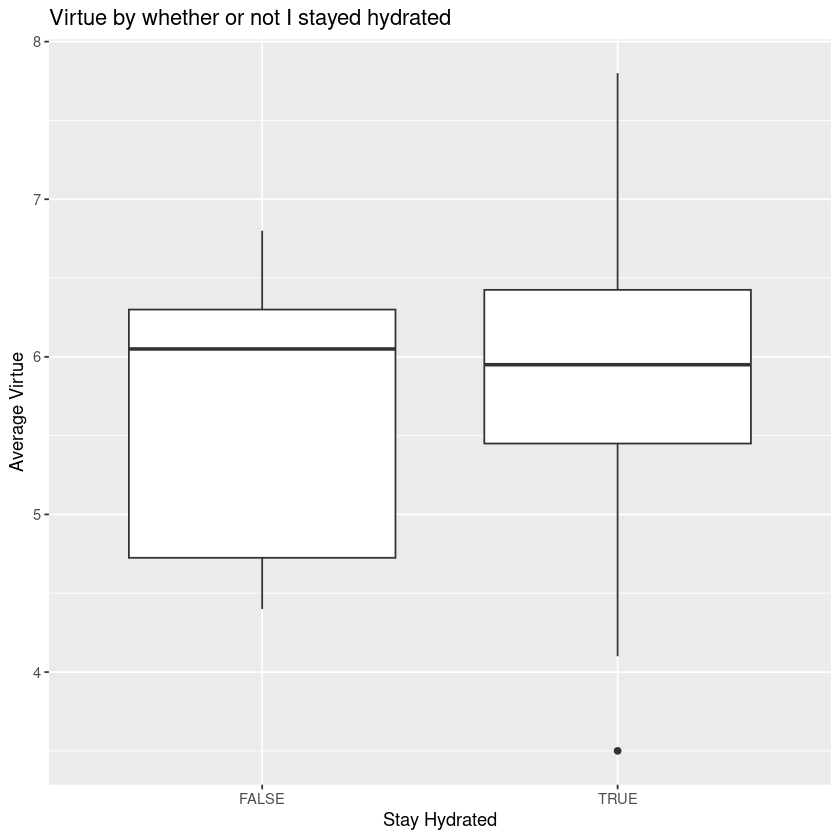

In [49]:
# Calculate the average virtue
my_log$Average_Virtue <- rowMeans(my_log[, c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")], na.rm = TRUE)

# Create a boxplot
ggplot(my_log, aes(x = Stay_Hydrated, y = Average_Virtue)) +
  geom_boxplot() +
  labs(x = "Stay Hydrated", y = "Average Virtue", title = "Virtue by whether or not I stayed hydrated")

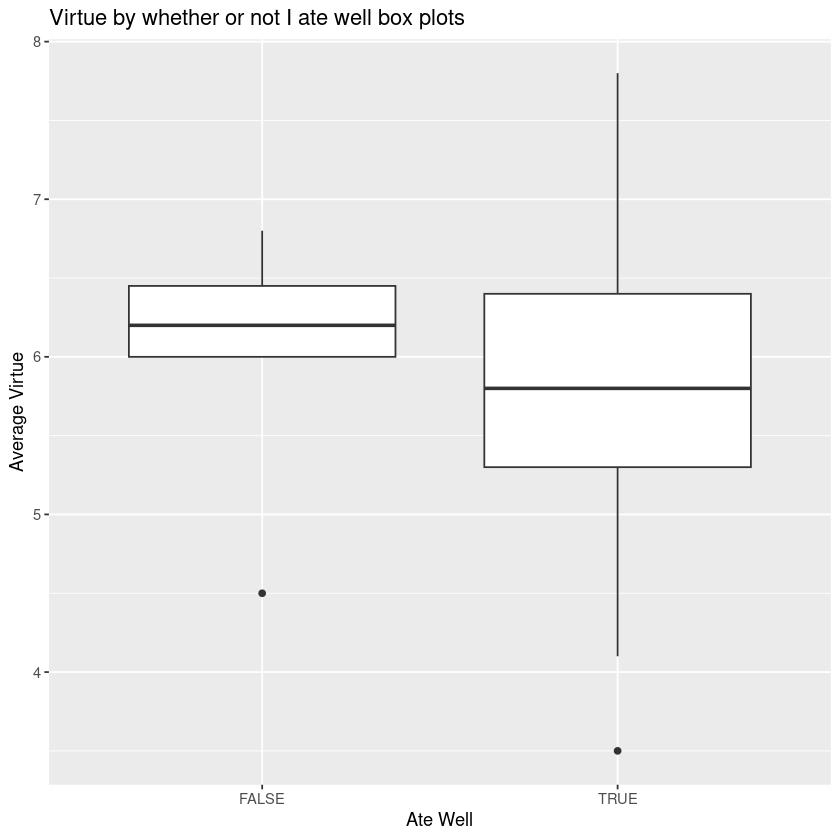

In [50]:
# Calculate the average virtue
my_log$Average_Virtue <- rowMeans(my_log[, c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")], na.rm = TRUE)

# Create a boxplot
ggplot(my_log, aes(x = Eat_well, y = Average_Virtue)) +
  geom_boxplot() +
  labs(x = "Ate Well", y = "Average Virtue", title = "Virtue by whether or not I ate well box plots")

### Is Virtue Correlated with Enjoying the Weather?

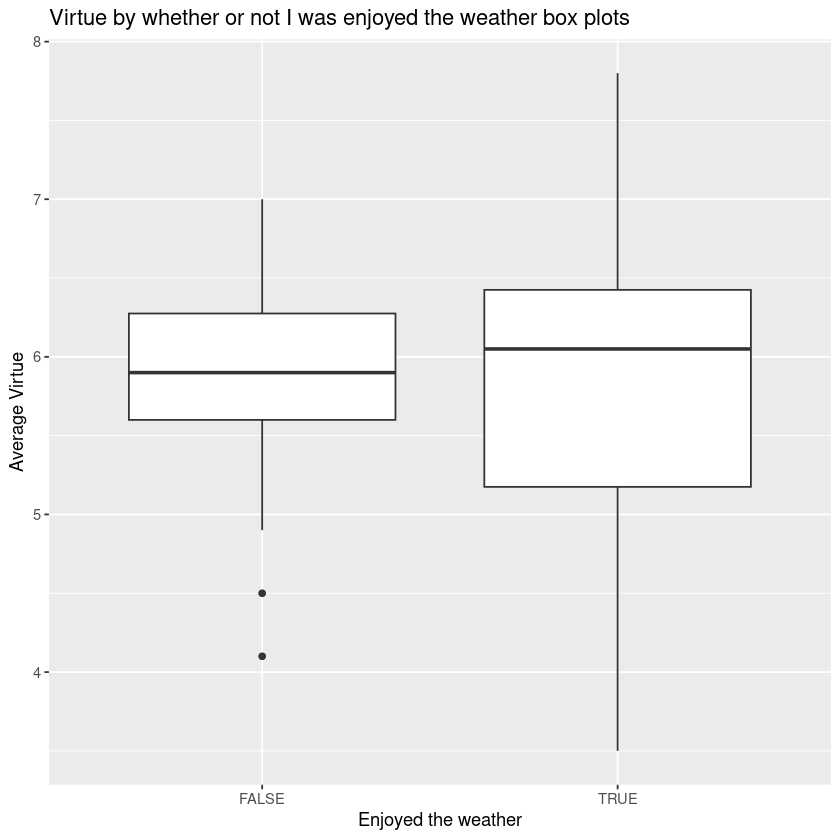

In [51]:
# Calculate the average virtue
my_log$Average_Virtue <- rowMeans(my_log[, c("silence", "order", "resolution", "frugality", "industry", "sincerety", "justice", "moderation", "tranquility", "humility")], na.rm = TRUE)

# Create a boxplot
ggplot(my_log, aes(x = Enjoy_the_weather, y = Average_Virtue)) +
  geom_boxplot() +
  labs(x = "Enjoyed the weather", y = "Average Virtue", title = "Virtue by whether or not I was enjoyed the weather box plots")